# Setup

In [1]:
# Data wrangling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder, MinMaxScaler

# Models
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Models Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Save model
import pickle

# Set output as pandas
from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
## -- Functions - ##
def get_metrics(y_true, y_pred):
    dict_metrics = {
        'Accuracy': metrics.accuracy_score(y_true, y_pred),
        'Balanced Accuracy': metrics.balanced_accuracy_score(y_true, y_pred),
        'Recall': metrics.recall_score(y_true, y_pred),
        'Precison': metrics.precision_score(y_true, y_pred),
        'F1': metrics.f1_score(y_true, y_pred),
        'ROC_AUC': metrics.roc_auc_score(y_true, y_pred)
    }
    return dict_metrics

In [3]:
# Load data
df = pd.read_csv('../data/customer_churn.csv', index_col='CustomerID')

# Data Understanding

In [4]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,1
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7032 non-null   float64
 1   Longitude          7032 non-null   float64
 2   Gender             7032 non-null   object 
 3   Senior Citizen     7032 non-null   object 
 4   Partner            7032 non-null   object 
 5   Dependents         7032 non-null   object 
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   object 
 8   Multiple Lines     7032 non-null   object 
 9   Internet Service   7032 non-null   object 
 10  Online Security    7032 non-null   object 
 11  Online Backup      7032 non-null   object 
 12  Device Protection  7032 non-null   object 
 13  Tech Support       7032 non-null   object 
 14  Streaming TV       7032 non-null   object 
 15  Streaming Movies   7032 non-null   object 
 16  Contract      

In [6]:
df.describe()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,36.283307,-119.799215,32.421786,64.798208,2283.300441,4401.445108,0.265785
std,2.456118,2.157588,24.545260,30.085974,2266.771362,1182.414266,0.441782
min,32.555828,-124.301372,1.000000,18.250000,18.800000,2003.000000,0.000000
25%,34.030915,-121.815412,9.000000,35.587500,401.450000,3469.750000,0.000000
50%,36.391777,-119.735410,29.000000,70.350000,1397.475000,4527.500000,0.000000
75%,38.227285,-118.043237,55.000000,89.862500,3794.737500,5381.000000,1.000000
max,41.962127,-114.192901,72.000000,118.750000,8684.800000,6500.000000,1.000000


In [7]:
# Sem valores duplicados
df.duplicated().any()

False

In [8]:
# Verificando se os nossos dados estão desbalanceados
df['Churn Value'].value_counts()

0    5163
1    1869
Name: Churn Value, dtype: int64

# Data Preparation

In [9]:
df.info(max_cols=25)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7032 non-null   float64
 1   Longitude          7032 non-null   float64
 2   Gender             7032 non-null   object 
 3   Senior Citizen     7032 non-null   object 
 4   Partner            7032 non-null   object 
 5   Dependents         7032 non-null   object 
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   object 
 8   Multiple Lines     7032 non-null   object 
 9   Internet Service   7032 non-null   object 
 10  Online Security    7032 non-null   object 
 11  Online Backup      7032 non-null   object 
 12  Device Protection  7032 non-null   object 
 13  Tech Support       7032 non-null   object 
 14  Streaming TV       7032 non-null   object 
 15  Streaming Movies   7032 non-null   object 
 16  Contract      

In [10]:
# separando na variáveis categoricas e numericas

numerical_features =[
    'Latitude',
    'Longitude',
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    'CLTV'    
]

categorical_features =[
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method'
]

features =  numerical_features + categorical_features
target =  'Churn Value'

In [11]:
df.columns

Index(['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Churn Value'],
      dtype='object')

In [12]:
# Separando a base em treino e teste
x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=2024)

In [13]:
# Criando o Pipeline

numerical_transformer =  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')), #caso tenha valores nulos coloque a media
    ('scaler', StandardScaler()) #caso tenha valores nulos coloque a media
])

categorical_transform = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

preprocessor =  ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transform, categorical_features)
])

preprocessor.fit_transform(x_train)

,num__Latitude,num__Longitude,num__Tenure Months,num__Monthly Charges,num__Total Charges,num__CLTV,cat__Gender_Male,cat__Senior Citizen_Yes,cat__Partner_Yes,cat__Dependents_Yes,...,cat__Streaming Movies_No internet service,cat__Streaming Movies_Yes,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__Paperless Billing_Yes,cat__Payment Method_Bank transfer (automatic),cat__Payment Method_Credit card (automatic),cat__Payment Method_Electronic check,cat__Payment Method_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,
1354-YZFNB,1.674967,-1.679836,-1.154276,-1.498997,-0.970513,0.990189,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1629-DQQVB,0.117018,0.851063,-0.746890,-0.484395,-0.689159,-1.762583,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4174-LPGTI,-0.946150,1.308395,0.353054,0.060268,0.197502,-1.604651,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1228-FZFRV,-0.913462,0.701207,0.719702,1.370450,1.345054,0.958773,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5846-QFDFI,-1.412465,1.537951,0.027145,0.794236,0.267808,-0.644322,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840-EFJQB,-0.793749,0.647945,-1.276492,0.320976,-0.968076,-0.144204,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2159-TURXX,1.825115,-1.460181,-1.113538,-1.482391,-0.958767,-1.633520,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271-UODNO,0.399733,-0.972797,0.271577,-0.359853,-0.034318,-1.720977,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


# Modeling & Evaluation

## DummyRegressor
Verificando o quanto o modelo mais basico vai performar

In [14]:
model_pipeline =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyClassifier())
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'CLTV']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('model', DummyClassifier())])

In [21]:
params = {
    'model':[
        LogisticRegressionCV(max_iter=1_000),
        LogisticRegression(),
        GradientBoostingClassifier(random_state=2024),
        RandomForestClassifier(random_state=2024),
        LGBMClassifier(random_state=2024),
        DummyClassifier()
    ]
}

# verificando para cada modelo os resultados
grid_model = GridSearchCV(model_pipeline, param_grid=params, cv=3, scoring='f1', verbose=1)
grid_model.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 998, number of negative: 2752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1416
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266133 -> initscore=-1.014330
[LightGBM] [Info] Start training from score -1.014330
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhe

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'Tenure '
                                                                          'Months',
                                                                          'Monthly '
                                                                          'Charges',
                                                                          'Total '
                                                                          'Charges',
                                                                          'CLTV']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender...
                                                                          'TV',
                                                                          'Streaming '
                                                                          'Movies',
                                                                          'Contract',
                                                                          'Paperless '
                                                                          'Billing',
                                                                          'Payment '
                                                                          'Method'])])),
                                       ('model', DummyClassifier())]),
             param_grid={'model': [LogisticRegressionCV(max_iter=1000),
                                   LogisticRegression(),
                                   GradientBoostingClassifier(random_state=2024),
                                   RandomForestClassifier(random_state=2024),
                                   LGBMClassifier(random_state=2024),
                                   DummyClassifier()]},
             scoring='f1', verbose=1)

In [22]:
# Descobrindo qual foi o melhor estimador
grid_model.best_estimator_


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'CLTV']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('model', LogisticRegressionCV(max_iter=1000))])

In [24]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.iloc[:,~df_cv_results.columns.str.contains('split|fit')].head(10)

,mean_score_time,std_score_time,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,0.032192,0.006084,LogisticRegressionCV(max_iter=1000),{'model': LogisticRegressionCV(max_iter=1000)},0.611211,0.004457
2,0.027084,0.005639,LogisticRegression(),{'model': LogisticRegression()},0.610870,0.005309
3,0.030524,0.001367,GradientBoostingClassifier(random_state=2024),{'model': GradientBoostingClassifier(random_st...,0.598798,0.026980
4,0.040161,0.005663,LGBMClassifier(random_state=2024),{'model': LGBMClassifier(random_state=2024)},0.584159,0.011295
5,0.072695,0.006539,RandomForestClassifier(random_state=2024),{'model': RandomForestClassifier(random_state=...,0.577774,0.022081
6,0.029779,0.000130,DummyClassifier(),{'model': DummyClassifier()},0.000000,0.000000


In [26]:
# Colocando pesos as classes

params = {
    'model':[
        LogisticRegressionCV(max_iter=1_000, class_weight='balanced'),
        LogisticRegression(),
        RandomForestClassifier(random_state=2024, class_weight='balanced'),
        LGBMClassifier(random_state=2024, class_weight='balanced'),
        DummyClassifier()
    ]
}

# verificando para cada modelo os resultados
grid_model = GridSearchCV(model_pipeline, param_grid=params, cv=3, scoring='f1', verbose=1)
grid_model.fit(x_train, y_train)


df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.iloc[:,~df_cv_results.columns.str.contains('split|fit')].head(10)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 998, number of negative: 2752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1416
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1416
[LightGBM] [Info] Number o

,mean_score_time,std_score_time,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,0.030450,0.000579,"LogisticRegressionCV(class_weight='balanced', ...",{'model': LogisticRegressionCV(class_weight='b...,0.634707,0.002184
2,0.046292,0.008774,"LGBMClassifier(class_weight='balanced', random...",{'model': LGBMClassifier(class_weight='balance...,0.628850,0.011209
3,0.029471,0.002615,LogisticRegression(),{'model': LogisticRegression()},0.610870,0.005309
4,0.083672,0.010497,RandomForestClassifier(class_weight='balanced'...,{'model': RandomForestClassifier(class_weight=...,0.570673,0.012088
5,0.030087,0.003455,DummyClassifier(),{'model': DummyClassifier()},0.000000,0.000000


Temos que os resultados foram melhores que anteriormente

In [39]:
# Explorando ainda mais a regressão logistica já que foi o melhor encontrado


model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=2023, max_iter=1_000))
])

params = {
    'preprocessor__num__scaler': [StandardScaler(), PowerTransformer()],
    'model__class_weight': ['balanced'],
    'model__C': [0.001, 0.01, 0.1],
}

grid = GridSearchCV(model_pipeline, params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

df_grid_results = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_grid_results.iloc[:,~df_grid_results.columns.str.contains('split|fit')]


Fitting 3 folds for each of 6 candidates, totalling 18 fits


,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_preprocessor__num__scaler,params,mean_test_score,std_test_score
rank_test_score,,,,,,,,
1,0.089096,0.005528,0.1,balanced,PowerTransformer(),"{'model__C': 0.1, 'model__class_weight': 'bala...",0.643435,0.006888
2,0.100684,0.005933,0.01,balanced,PowerTransformer(),"{'model__C': 0.01, 'model__class_weight': 'bal...",0.639064,0.004018
3,0.079583,0.013206,0.1,balanced,StandardScaler(),"{'model__C': 0.1, 'model__class_weight': 'bala...",0.636224,0.002675
4,0.069350,0.013200,0.01,balanced,StandardScaler(),"{'model__C': 0.01, 'model__class_weight': 'bal...",0.631305,0.005056
5,0.080500,0.021629,0.001,balanced,PowerTransformer(),"{'model__C': 0.001, 'model__class_weight': 'ba...",0.625854,0.005232
6,0.125226,0.038342,0.001,balanced,StandardScaler(),"{'model__C': 0.001, 'model__class_weight': 'ba...",0.620670,0.005840


In [40]:
tuned_model = grid.best_estimator_

y_pred = tuned_model.predict(x_test)
get_metrics(y_test, y_pred)

{'Accuracy': 0.7683013503909026,
 'Balanced Accuracy': 0.7806612701655768,
 'Recall': 0.806970509383378,
 'Precison': 0.5423423423423424,
 'F1': 0.6487068965517241,
 'ROC_AUC': 0.7806612701655767}

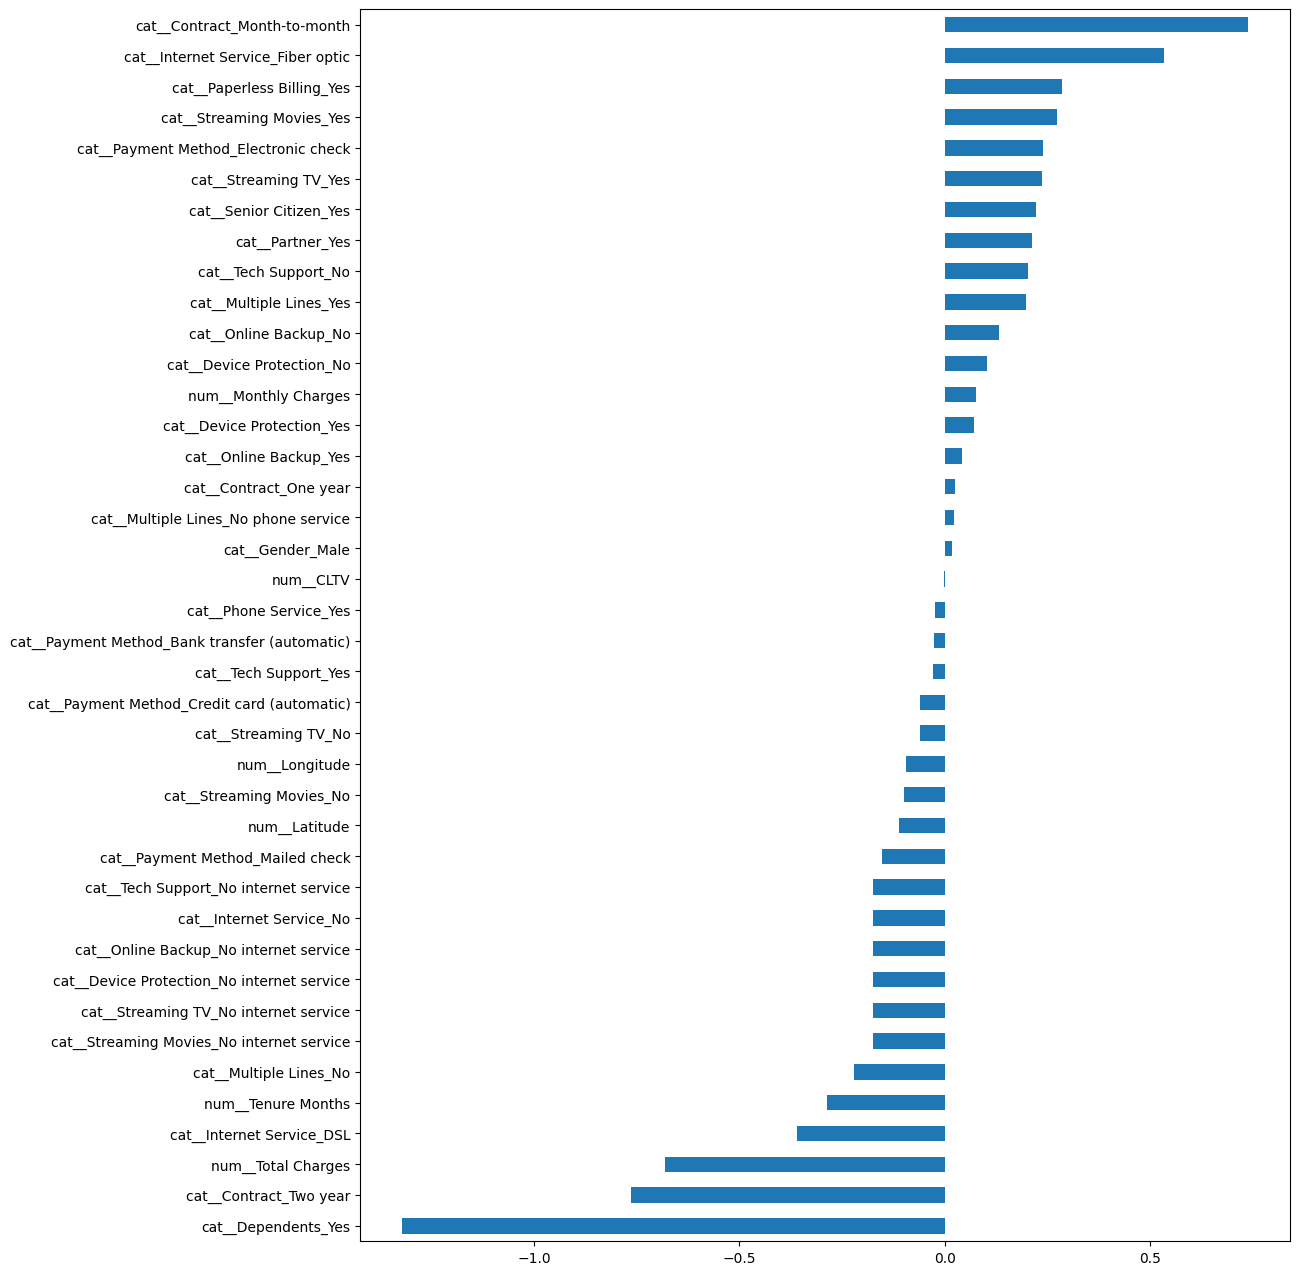

In [43]:
# Verificando as importancias das features do modelo
lr_model = tuned_model.named_steps['model']

coefs = pd.Series(
    data = lr_model.coef_[0],
    index=lr_model.feature_names_in_
)

plt.figure(figsize=(12,16))
coefs.sort_values().plot.barh()
plt.show()

Nesse caso temos que variáveis que são extremamente importantes, já outras nem tanto
EX: quem tem contrato  mês a mês tem mais chance de fazer churn
quem tem dependentes tem menos chance de ser churn

# Deployment

In [45]:
# Montando o arquivo pickle
with open('../models/model.pkl', 'wb') as model_file:
    pickle.dump(tuned_model, model_file)